MRI Lab Notebook
--------------

We will open the DICOM file IM_0275

Python provides some tools for DICOM image opening in the package **PyDICOM**.

Your installation will likely be missing this package, so you can install it using Anaconda. Open an Anaconda Prompt and type **pip install pydicom**. The version that would likely be installed is pydicom-0.9.9

In [9]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import dicom

RefDs = dicom.read_file('IM_0275')

print(RefDs)




(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_SE', 'M', 'SE']
(0008, 0012) Instance Creation Date              DA: '20171115'
(0008, 0013) Instance Creation Time              TM: '111956'
(0008, 0014) Instance Creator UID                UI: 1.3.46.670589.11.34055.5
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.46.670589.11.34055.5.0.4164.2017111511053318291
(0008, 0020) Study Date                          DA: '20171115'
(0008, 0021) Series Date                         DA: '20171115'
(0008, 0022) Acquisition Date                    DA: '20171115'
(0008, 0023) Content Date                        DA: '20171115'
(0008, 0030) Study Time                          TM: '102824'
(0008, 0031) Series Time                         TM: '110230.23000'
(0008, 0032) Acquisition Time                    TM: '110230.23'
(0008, 0



Let's answer some questions with the Metadata:



In [10]:
from datetime import datetime

print('a) The image is '+str(RefDs.Rows)+'x'+str(RefDs.Columns)+' pixels')
print('b) The manufacturer is '+str(RefDs.Manufacturer))
print('c) The model is '+str(RefDs.ManufacturersModelName))
print('d) The image modality is '+str(RefDs.Modality))
d=datetime.strptime(RefDs.AcquisitionDate,'%Y%m%d')
print('e) The image was made on '+str(d.date()))
if RefDs.PatientsName=='':
    print('f) The patient\'s name is unkown')
else:
    print('f) The patient\'s name is '+str(RefDs.PatientsName))

print('g) The image was encoded with '+str(RefDs.BitsStored)+' bits ')

a) The image is 512x512 pixels
b) The manufacturer is Philips Medical Systems
c) The model is Achieva
d) The image modality is MR
e) The image was made on 2017-11-15
f) The patient's name is res_watermelon
g) The image was encoded with 12 bits 



Let's now show the image. First, we need to dimension an array with all the pixels in the image. Then, we can load the information and then show the image.

[0, 511, 0, 511]

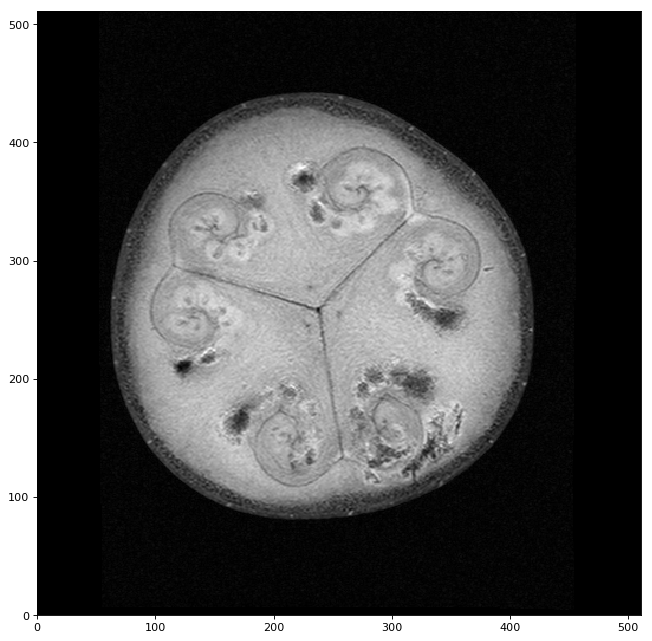

In [11]:
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns))
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
ds = dicom.read_file('IM_0275')
ArrayDicom[:,:]=ds.pixel_array

#plt.figure()
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.axes().set_aspect('equal') #this makes the image square
plt.set_cmap(plt.gray()) #grayscale
x=np.arange(RefDs.Rows)
y=np.arange(RefDs.Columns)

plt.pcolormesh(x, y, np.flipud(ArrayDicom[:, :]))
plt.axis([x.min(),x.max(),y.min(),y.max()])

## Summary

In this example we learned how to open and display a DICOM image and how to access Metadata in the DICOM file.



Comments and corrections welcome!

References
---------------

* https://pyscience.wordpress.com/2014/09/08/dicom-in-python-importing-medical-image-data-into-numpy-with-pydicom-and-vtk/